In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from wordcloud import WordCloud
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

In [3]:
!pip install wordcloud
!pip install plotly wordcloud ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [4]:
# For colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# For colab
# ""  California data ""
file_path1 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/San_Francisco_listings.csv'
file_path2 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/San_Mateo_listings.csv'
file_path3 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/Santa_Clara_listings.csv'
file_path4 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/Santa_Cruz_listings.csv'
file_path5 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/los_angeles.csv'
file_path6 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/oakland.csv'
file_path7 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/pacific_grove.csv'
file_path8 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/san_diego.csv'

## Oregon data
file_path9 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/portland_oregon_listings.csv'
file_path10 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/salem_oregon_listings.csv'

## Washington State data
file_path11 = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Data Collection/AirBNB Data/All Data/seattle_washington_listings.csv'


In [6]:
#For anaconda
# # ""  California data ""
# file_path1='D:/MSDA_SJSU/Data 230/Project/Airbnb/San_Francisco_listings.csv'
# file_path2='D:/MSDA_SJSU/Data 230/Project/Airbnb/San_Mateo_listings.csv'
# file_path3='D:/MSDA_SJSU/Data 230/Project/Airbnb/Santa_Clara_listings.csv'
# file_path4='D:/MSDA_SJSU/Data 230/Project/Airbnb/Santa_Cruz_listings.csv'
# file_path5='D:/MSDA_SJSU/Data 230/Project/Airbnb/los_angeles.csv'
# file_path6='D:/MSDA_SJSU/Data 230/Project/Airbnb/oakland.csv'
# file_path7='D:/MSDA_SJSU/Data 230/Project/Airbnb/pacific_grove.csv'
# file_path8='D:/MSDA_SJSU/Data 230/Project/Airbnb/san_diego.csv'

# ## Oregon data
# file_path9='D:/MSDA_SJSU/Data 230/Project/Airbnb/portland_oregon_listings.csv'
# file_path10='D:/MSDA_SJSU/Data 230/Project/Airbnb/salem_oregon_listings.csv'

# ## Washington State data
# file_path11='D:/MSDA_SJSU/Data 230/Project/Airbnb/seattle_washington_listings.csv'

In [7]:
sf_df=pd.read_csv(file_path1)
sm_df=pd.read_csv(file_path2)
sclara_df=pd.read_csv(file_path3)
scruz_df=pd.read_csv(file_path4)
la_df=pd.read_csv(file_path5)
oak_df=pd.read_csv(file_path6)
pg_df=pd.read_csv(file_path7)
sdiego_df=pd.read_csv(file_path8)

port_df=pd.read_csv(file_path9)
salem_df=pd.read_csv(file_path10)

seat_df=pd.read_csv(file_path11)

In [8]:
west_df = pd.concat([sf_df, sm_df, sclara_df, scruz_df,la_df,oak_df,pg_df,sdiego_df,port_df,salem_df,seat_df])


In [9]:
west_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50489368,https://www.airbnb.com/rooms/50489368,20240904163718,2024-09-04,previous scrape,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,190158687,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.03
1,53687935,https://www.airbnb.com/rooms/53687935,20240904163718,2024-09-04,previous scrape,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,safe and quiet neighborhood,https://a0.muscache.com/pictures/347792c2-b0e2...,433577666,...,4.76,4.57,4.48,0005556,f,1,0,1,0,0.63
2,623833252305593889,https://www.airbnb.com/rooms/623833252305593889,20240904163718,2024-09-04,city scrape,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,2180153,...,5.00,4.93,4.73,2022-002139STR,f,2,1,1,0,0.57
3,53817024,https://www.airbnb.com/rooms/53817024,20240904163718,2024-09-04,previous scrape,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,Situated in Rincon Hill / East Cut neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,2180153,...,5.00,5.00,4.87,2022-002139STR,f,2,1,1,0,1.24
4,54381390,https://www.airbnb.com/rooms/54381390,20240904163718,2024-09-04,previous scrape,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2274937,...,5.00,5.00,4.89,STR-0005716,t,1,1,0,0,0.34


In [10]:
# Save the merged dataframe to a CSV file on the local drive
#csv_file_path = 'D:/MSDA_SJSU/Data 230/Project/west_coast_rental_df.csv'
#west_df.to_csv(csv_file_path, index=False)

In [11]:
west_df.shape

(91107, 75)

In [12]:
west_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91107 entries, 0 to 6441
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91107 non-null  int64  
 1   listing_url                                   91107 non-null  object 
 2   scrape_id                                     91107 non-null  int64  
 3   last_scraped                                  91107 non-null  object 
 4   source                                        91107 non-null  object 
 5   name                                          91106 non-null  object 
 6   description                                   88555 non-null  object 
 7   neighborhood_overview                         52721 non-null  object 
 8   picture_url                                   91107 non-null  object 
 9   host_id                                       91107 non-null  int64

In [13]:
#descriptive statistics
west_df.describe()[west_df.dtypes[west_df.dtypes != 'object'].index]

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.110700e+04,9.110700e+04,9.110700e+04,91105.000000,91105.000000,91107.000000,91107.000000,91107.000000,77634.000000,86616.000000,...,70956.000000,70948.000000,70956.000000,70946.000000,70945.000000,91107.000000,91107.000000,91107.000000,91107.000000,71010.000000
mean,4.833991e+17,2.024080e+13,1.778833e+08,139.050842,184.530728,36.290422,-119.616520,4.032182,1.554815,1.746005,...,4.775412,4.873524,4.870216,4.809757,4.712283,18.995500,15.815108,2.569232,0.165970,1.626471
std,4.858447e+17,1.345448e+08,1.845693e+08,689.464759,858.290342,4.263776,2.080257,2.851354,1.056699,1.347022,...,0.388161,0.318791,0.331046,0.338826,0.407619,60.803158,58.898611,15.843114,1.708383,1.901520
min,6.000000e+00,2.024062e+13,2.900000e+01,0.000000,0.000000,32.540760,-123.096950,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.146262e+07,2.024062e+13,2.226703e+07,1.000000,2.000000,33.993041,-122.247055,2.000000,1.000000,1.000000,...,4.730000,4.880000,4.880000,4.770000,4.650000,1.000000,1.000000,0.000000,0.000000,0.280000
50%,5.847470e+17,2.024090e+13,1.015370e+08,3.000000,5.000000,34.103410,-118.402700,3.000000,1.000000,1.000000,...,4.890000,4.960000,4.970000,4.910000,4.810000,2.000000,1.000000,0.000000,0.000000,0.990000
75%,9.624727e+17,2.024090e+13,3.260847e+08,14.000000,20.000000,37.591855,-118.203565,6.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.930000,9.000000,5.000000,1.000000,0.000000,2.460000
max,1.238217e+18,2.024090e+13,5.997497e+08,4682.000000,9019.000000,47.734087,-116.936852,16.000000,50.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,569.000000,569.000000,268.000000,34.000000,101.200000


In [14]:
west_df.shape

(91107, 75)

In [15]:

#displaying the columns with null values
west_df.columns[west_df.isnull().any()]

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_

In [16]:
##displaying the count of null values in each column when the null count is greater than zero
west_df.isnull().sum()[west_df.isnull().sum() > 0]

,0
name,1
description,2552
neighborhood_overview,38386
host_name,2
host_since,2
host_location,19674
host_about,37720
host_response_time,15204
host_response_rate,15204
host_acceptance_rate,13788


### Converting Price column into float

In [17]:
# Convert the 'price' column to float after removing special characters
west_df['price'] = west_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
west_df['price'].head()

,price
0,NaN
1,NaN
2,132.0
3,NaN
4,NaN


In [18]:
missing_values_df = pd.DataFrame(west_df.isnull().sum(), columns=['Missing Values'])

# Filter for rows where missing values are greater than 0
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print(missing_values_df)

                              Missing Values
name                                       1
description                             2552
neighborhood_overview                  38386
host_name                                  2
host_since                                 2
host_location                          19674
host_about                             37720
host_response_time                     15204
host_response_rate                     15204
host_acceptance_rate                   13788
host_is_superhost                       2603
host_thumbnail_url                         2
host_picture_url                           2
host_neighbourhood                     14409
host_listings_count                        2
host_total_listings_count                  2
host_verifications                         2
host_has_profile_pic                       2
host_identity_verified                     2
neighbourhood                          38385
neighbourhood_group_cleansed           39132
bathrooms 

In [19]:
#Printing null value percentage
def print_non_zero_null_percentage(df):
    # Calculate percentage of null values in each column
    null_percentage = df.isnull().mean() * 100

    # Filter and print only columns with non-zero null percentage
    non_zero_nulls = null_percentage[null_percentage > 0]
    print(non_zero_nulls)

In [20]:
print_non_zero_null_percentage(west_df)

name                              0.001098
description                       2.801102
neighborhood_overview            42.132877
host_name                         0.002195
host_since                        0.002195
host_location                    21.594389
host_about                       41.401868
host_response_time               16.688070
host_response_rate               16.688070
host_acceptance_rate             15.133854
host_is_superhost                 2.857080
host_thumbnail_url                0.002195
host_picture_url                  0.002195
host_neighbourhood               15.815470
host_listings_count               0.002195
host_total_listings_count         0.002195
host_verifications                0.002195
host_has_profile_pic              0.002195
host_identity_verified            0.002195
neighbourhood                    42.131779
neighbourhood_group_cleansed     42.951694
bathrooms                        14.788106
bathrooms_text                    0.054881
bedrooms   

### For analysis we will be dropping all id, url and scrapped date columns

In [21]:
#cal_df=cal_df.drop(columns=['id','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_thumbnail_url','host_picture_url','license'])

In [22]:
west_df=west_df.drop(columns=['id','scrape_id','last_scraped','host_id','license','source','calendar_last_scraped','calendar_updated','neighbourhood_group_cleansed'])

In [23]:
west_df.shape

(91107, 66)

In [24]:
#Checking duplicate values

duplicates = west_df.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()
total_duplicates

0

In [25]:
#Select only the numerical columns (int and float)

numerical_cols = west_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [26]:
print_non_zero_null_percentage(west_df[numerical_cols])

host_listings_count             0.002195
host_total_listings_count       0.002195
bathrooms                      14.788106
bedrooms                        4.929369
beds                           15.026288
price                          14.772740
minimum_minimum_nights          0.008781
maximum_minimum_nights          0.008781
minimum_maximum_nights          0.008781
maximum_maximum_nights          0.008781
minimum_nights_avg_ntm          0.008781
maximum_nights_avg_ntm          0.008781
review_scores_rating           22.058678
review_scores_accuracy         22.116852
review_scores_cleanliness      22.117949
review_scores_checkin          22.126730
review_scores_communication    22.117949
review_scores_location         22.128925
review_scores_value            22.130023
reviews_per_month              22.058678
dtype: float64


### We will perfom null imputation for all the numerical columns  subgrouping them based on relevant columns and taking median and mode based on data type of the columns

In [27]:
# Define the advanced subset-based imputation function
def impute_missing_values_subset_advanced_fixed(df, target_col, group_cols, dtype="continuous"):
    """
    Impute missing values in the target column using group-based statistics.
    Continuous variables use the median, and categorical variables use the mode.
    Handles cases where group is entirely NaN by falling back to global statistics.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        target_col (str): The column with missing values to impute.
        group_cols (list): List of columns to group by for imputation.
        dtype (str): Type of the target column ('continuous' or 'categorical').
    """
    if dtype == "continuous":
        global_stat = df[target_col].median()
        impute_func = lambda x: x.fillna(x.median() if not x.median() is np.nan else global_stat)
    elif dtype == "categorical":
        global_stat = df[target_col].mode()[0] if not df[target_col].mode().empty else None
        impute_func = lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_stat)
    else:
        raise ValueError("Invalid dtype. Choose 'continuous' or 'categorical'.")

    # Apply imputation within groups
    df[target_col] = df.groupby(group_cols)[target_col].transform(impute_func)
    return df

In [28]:
west_df.price

,price
0,NaN
1,NaN
2,132.0
3,NaN
4,NaN
...,...
6437,481.0
6438,82.0
6439,222.0
6440,40.0


In [29]:
# Define imputation strategies
subset_imputation_strategies_west_df = {
    "host_listings_count": ("continuous", ["host_is_superhost"]),
    "host_total_listings_count": ("continuous", ["host_is_superhost"]),
    "bathrooms": ("categorical", ["room_type", "property_type"]),
    "bedrooms": ("categorical", ["room_type", "property_type"]),
    "beds": ("categorical", ["room_type", "property_type"]),
    "price": ("continuous", ["room_type", "neighbourhood_cleansed"]),
    "minimum_minimum_nights": ("continuous", ["room_type"]),
    "maximum_minimum_nights": ("continuous", ["room_type"]),
    "minimum_maximum_nights": ("continuous", ["room_type"]),
    "maximum_maximum_nights": ("continuous", ["room_type"]),
    "minimum_nights_avg_ntm": ("continuous", ["room_type"]),
    "maximum_nights_avg_ntm": ("continuous", ["room_type"]),
    "review_scores_rating": ("continuous", ["room_type", "property_type"]),
    "review_scores_accuracy": ("continuous", ["room_type", "property_type"]),
    "review_scores_cleanliness": ("continuous", ["room_type", "property_type"]),
    "review_scores_checkin": ("continuous", ["room_type", "property_type"]),
    "review_scores_communication": ("continuous", ["room_type", "property_type"]),
    "review_scores_location": ("continuous", ["room_type", "property_type"]),
    "review_scores_value": ("continuous", ["room_type", "property_type"]),
    "reviews_per_month": ("continuous", ["room_type", "neighbourhood_cleansed"]),
}

In [30]:
# Apply imputation for each column
for col, (dtype, group_cols) in subset_imputation_strategies_west_df.items():
    west_df = impute_missing_values_subset_advanced_fixed(west_df, col, group_cols, dtype=dtype)

# Checking for remaining null values after imputation
final_null_counts_west_df = west_df.isnull().sum()



In [31]:
# Create SimpleImputer to fill NaN values with median
#imputer = SimpleImputer(strategy='median')



In [32]:
# Apply imputer only to numerical columns
west_df[west_df.select_dtypes(include='number').columns].isnull().sum()

,0
host_listings_count,2603
host_total_listings_count,2603
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,141
minimum_nights,0


 - We will impute remaining null values with corresponding median values

In [33]:
# List of columns to impute with the median
columns_to_impute = [
    "host_listings_count", "host_total_listings_count", "price",
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication", "review_scores_location",
    "review_scores_value", "reviews_per_month"
]

# Impute each column with its median
for col in columns_to_impute:
    if col in west_df.columns:
        west_df[col].fillna(west_df[col].median(), inplace=True)

<ipython-input-33-94ede3411156>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  west_df[col].fillna(west_df[col].median(), inplace=True)


In [34]:
## Checking null values in numerical fields
west_df[numerical_cols].isnull().sum()

,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
minimum_nights,0


In [35]:
west_df.head()

,listing_url,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50489368,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/190158687,Christine,2018-05-17,NaN,NaN,...,5.00,5.00,5.00,5.00,t,1,1,0,0,0.03
1,https://www.airbnb.com/rooms/53687935,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,safe and quiet neighborhood,https://a0.muscache.com/pictures/347792c2-b0e2...,https://www.airbnb.com/users/show/433577666,Hossna,2021-11-26,"San Francisco, CA",NaN,...,4.76,4.76,4.57,4.48,f,1,0,1,0,0.63
2,https://www.airbnb.com/rooms/623833252305593889,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/2180153,Duolin,2012-04-19,"San Francisco, CA",NaN,...,4.87,5.00,4.93,4.73,f,2,1,1,0,0.57
3,https://www.airbnb.com/rooms/53817024,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,Situated in Rincon Hill / East Cut neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2180153,Duolin,2012-04-19,"San Francisco, CA",NaN,...,4.95,5.00,5.00,4.87,f,2,1,1,0,1.24
4,https://www.airbnb.com/rooms/54381390,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/2274937,Dan,2012-05-02,"San Francisco, CA",NaN,...,5.00,5.00,5.00,4.89,t,1,1,0,0,0.34


### Null handling for text based columns

In [36]:
#Select only the object columns

text_cols = west_df.select_dtypes(include=['object']).columns
text_cols

Index(['listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')

In [37]:
print_non_zero_null_percentage(west_df[text_cols])

name                       0.001098
description                2.801102
neighborhood_overview     42.132877
host_name                  0.002195
host_since                 0.002195
host_location             21.594389
host_about                41.401868
host_response_time        16.688070
host_response_rate        16.688070
host_acceptance_rate      15.133854
host_is_superhost          2.857080
host_thumbnail_url         0.002195
host_picture_url           0.002195
host_neighbourhood        15.815470
host_verifications         0.002195
host_has_profile_pic       0.002195
host_identity_verified     0.002195
neighbourhood             42.131779
bathrooms_text             0.054881
has_availability           4.626428
first_review              22.058678
last_review               22.058678
dtype: float64


 - We will be handling null values in these text fields in following way:
   name	: Replace with "Unnamed Listing".
   description: Replace with "No Description Provided".
   neighborhood_overview	42.1%	- we will Drop column    
    host_name	0.2%	Replace with "Unknown Host".
    host_since	0.2%	Replace with the most frequent date or "Unknown".
    host_about	41.4%	Drop column
    host_response_time	16.7%	Impute with mode or "No Response Time Info".
    host_response_rate	16.7%	Impute with mode or "Unknown".
    host_acceptance_rate	15.1%	Impute with mode or "Unknown".
    host_is_superhost	2.9%	Impute with mode.
    host_neighbourhood	15.8%	Impute with mode or "Unknown Neighbourhood".
    host_verifications	0.2%	Replace with "Not Verified".
    host_has_profile_pic	0.2%	Replace with "No Profile Picture".
    host_identity_verified	0.2%	Replace with "Not Verified".
    neighbourhood	42.1%	Drop column or impute as "Not Provided".
    neighbourhood_group_cleansed	42.9%	Drop
    bathrooms_text	0.05%	Impute with mode or "Unknown".
    has_availability	4.6%	Replace with "Unknown Availability".


In [38]:
# Dictionary for imputation values
text_imputations = {
    "name": "Unnamed Listing",
    "description": "No Description Provided",
    "host_name": "Unknown Host",
    "host_since": None,  # Will handle with mode separately
    "host_response_time": None,  # Will handle with mode
    "host_response_rate": None,  # Will handle with mode
    "host_acceptance_rate": None,  # Will handle with mode
    "host_is_superhost": None,  # Will handle with mode
    "host_neighbourhood": None,  # Will handle with mode
    "host_verifications": "Not Verified",
    "host_has_profile_pic": "No Profile Picture",
    "host_identity_verified": "Not Verified",
    "bathrooms_text": None,  # Will handle with mode
    "has_availability": "Unknown Availability",
}



In [39]:
# Columns to drop due to high percentage of null values
columns_to_drop = [
    "neighborhood_overview",
    "host_about",
    "neighbourhood_group_cleansed",
    "neighbourhood"  # Optional: Drop if not critical
]

In [40]:
# Drop specified columns
west_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Apply direct replacements
for col, replacement in text_imputations.items():
    if replacement is not None and col in west_df.columns:
        west_df[col].fillna(replacement, inplace=True)



<ipython-input-40-744160988fdc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  west_df[col].fillna(replacement, inplace=True)


In [41]:
# Handle columns requiring mode-based imputation
columns_with_mode = [
    "host_since", "host_response_time", "host_response_rate", "host_acceptance_rate",
    "host_is_superhost", "host_neighbourhood", "bathrooms_text"
]

for col in columns_with_mode:
    if col in west_df.columns:
        west_df[col].fillna(west_df[col].mode()[0], inplace=True)



<ipython-input-41-0bf4c9e1d421>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  west_df[col].fillna(west_df[col].mode()[0], inplace=True)


In [42]:
# Verify remaining null values
west_df.isnull().sum()



,0
listing_url,0
name,0
description,0
picture_url,0
host_url,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0



 ### Feature Engineering

 - City and State for the hosted AIRBNB:

   We will perfform feature egineering to compute City and State for the hosted AIRBNB from latitude and longitude data.

In [43]:
!pip install geopy


### We are using Cartographic Boundary File from Census data to get City and State from latitude and longitude (shp files)

## Reference

https://www.census.gov/programs-surveys/geography/technical-documentation/naming-convention/cartographic-boundary-file.html

In [44]:
#ls '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Code/Preprocessing/cb_2023_us_state_20m/'

In [45]:
import geopandas as gpd
from shapely.geometry import Point

# Load a shapefile containing state and city boundaries
# You can find a US state or city shapefile online (e.g., https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)
county_shapefile = '/content/drive/Shared drives/Data 230_Data Visualization_Group Project/Code/Preprocessing/cb_2023_us_county_20m/cb_2023_us_county_20m.shp'

# Load the shapefile

gdf = gpd.read_file(county_shapefile)

# Check column names in the shapefile
print("Shapefile columns:", gdf.columns)

# Ensure CRS matches
gdf = gdf.to_crs(epsg=4326)

# Create geometry in your DataFrame
west_df['geometry'] = west_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
west_gdf = gpd.GeoDataFrame(west_df, geometry='geometry', crs="EPSG:4326")

# Perform the spatial join
joined = gpd.sjoin(west_gdf, gdf, how="left", predicate="intersects")

# Use the correct column name for state
west_df['State'] = joined['STATE_NAME']  # Replace with the actual column name
west_df['City'] = joined['NAME'] # If no city column exists

Shapefile columns: Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOIDFQ', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry'],
      dtype='object')


In [46]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,027,00345518,0500000US13027,13027,Brooks,Brooks County,GA,Georgia,06,1277341276,11955761,"POLYGON ((-83.73616 31.03768, -83.57396 31.033..."
1,31,095,00835869,0500000US31095,31095,Jefferson,Jefferson County,NE,Nebraska,06,1476765697,14202851,"POLYGON ((-97.36869 40.35039, -96.91606 40.349..."
2,51,683,01498430,0500000US51683,51683,Manassas,Manassas city,VA,Virginia,25,25493247,146287,"POLYGON ((-77.52666 38.7332, -77.49545 38.7706..."
3,56,021,01605075,0500000US56021,56021,Laramie,Laramie County,WY,Wyoming,06,6956355036,4348083,"POLYGON ((-105.27824 41.65666, -104.65334 41.6..."
4,13,135,01688166,0500000US13135,13135,Gwinnett,Gwinnett County,GA,Georgia,06,1116606767,15938345,"POLYGON ((-84.27117 33.9598, -84.26266 33.9871..."


In [47]:
west_df['State'].unique()

array(['California', nan, 'Oregon', 'Washington'], dtype=object)

In [48]:
  west_df.City.unique()

array(['San Francisco', nan, 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Monterey', 'Los Angeles', 'Ventura', 'San Bernardino', 'Orange',
       'Alameda', 'San Diego', 'Multnomah', 'Washington', 'Clackamas',
       'Polk', 'Marion', 'King'], dtype=object)

In [49]:
###Checking null values in City and State columns
west_df[['City','State']].isnull().sum()

,0
City,596
State,596


In [50]:
### Replacing null values in City and State columns with 'Unknown'
west_df['City'].fillna('Unknown', inplace=True)
west_df['State'].fillna('Unknown', inplace=True)

<ipython-input-50-33b6dc80b7e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  west_df['City'].fillna('Unknown', inplace=True)
<ipython-input-50-33b6dc80b7e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [51]:
## dropping 'Geometry' column. And also dropping host_location (some times host location are different from where the property as we are calculating the location of the hosted property from lattitude and longitudinal data
west_df.drop(columns=['geometry','host_location'],inplace=True)

 - URL columns :
       - converting them into url_present columns
       
       - Some of the categorical variables has URLs for host picture,rental pictures. For renting the property the presence of those URLs attracts customers and susequently affect the performace of the rental. Here we will transform these url field into binary . If url is present then field = 1 else 0. Also we will convert these URL names into url_present

In [52]:
# Identify columns that contain URLs
url_cols = [col for col in west_df.columns if 'url' in col.lower()]
url_cols

['listing_url',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [53]:
# Convert URL fields to binary: 1 if present, 0 if absent
for col in url_cols:
    west_df[col] = west_df[col].apply(lambda x: 1 if pd.notnull(x) and x.strip() != '' else 0)

# Rename URL columns to reflect binary representation
west_df.rename(columns={col: col.replace('_url', '_url_present') for col in url_cols}, inplace=True)


In [54]:
west_df.head()

,listing_url_present,name,description,picture_url_present,host_url_present,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,State,City
0,1,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",1,1,Christine,2018-05-17,within an hour,100%,100%,...,5.00,5.00,t,1,1,0,0,0.03,California,San Francisco
1,1,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,1,1,Hossna,2021-11-26,within an hour,100%,94%,...,4.57,4.48,f,1,0,1,0,0.63,California,San Francisco
2,1,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,4.93,4.73,f,2,1,1,0,0.57,California,San Francisco
3,1,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,5.00,4.87,f,2,1,1,0,1.24,California,San Francisco
4,1,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,1,1,Dan,2012-05-02,within an hour,100%,100%,...,5.00,4.89,t,1,1,0,0,0.34,California,San Francisco


In [55]:
west_df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'numbe

In [56]:
west_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91107 entries, 0 to 6441
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url_present                           91107 non-null  int64  
 1   name                                          91107 non-null  object 
 2   description                                   91107 non-null  object 
 3   picture_url_present                           91107 non-null  int64  
 4   host_url_present                              91107 non-null  int64  
 5   host_name                                     91107 non-null  object 
 6   host_since                                    91107 non-null  object 
 7   host_response_time                            91107 non-null  object 
 8   host_response_rate                            91107 non-null  object 
 9   host_acceptance_rate                          91107 non-null  objec

 - Feature Engineering for host_since', 'first_review', 'last_review'

   we will create :

  - host_tenure_days
  - days_since_first_review
  - days_since_last_review


In [57]:
west_df[['host_since','first_review','last_review']]

,host_since,first_review,last_review
0,2018-05-17,2021-08-12,2021-08-12
1,2021-11-26,2021-12-14,2023-06-24
2,2012-04-19,2022-07-11,2024-08-01
3,2012-04-19,2022-02-06,2023-06-02
4,2012-05-02,2022-06-30,2023-08-15
...,...,...,...
6437,2021-04-23,NaN,NaN
6438,2018-04-16,NaN,NaN
6439,2024-06-21,NaN,NaN
6440,2024-06-05,NaN,NaN


In [58]:
# Convert date columns to datetime format
date_columns = ['host_since', 'first_review', 'last_review']
for col in date_columns:
    if col in west_df.columns:
        west_df[col] = pd.to_datetime(west_df[col], errors='coerce')

In [59]:
# Feature engineering: Calculate the insights
current_date = pd.Timestamp.now()

# Host Tenure: Days since host joined
west_df['hosting_experience'] = (current_date - west_df['host_since']).dt.days

# Days Since First Review
west_df['days_since_first_review'] = (current_date - west_df['first_review']).dt.days

# Days Since Last Review
west_df['days_since_last_review'] = (current_date - west_df['last_review']).dt.days

# Replace negative values (e.g., future dates) with NaN
west_df['hosting_experience'] = west_df['hosting_experience'].apply(lambda x: x if x >= 0 else None)
west_df['days_since_first_review'] = west_df['days_since_first_review'].apply(lambda x: x if x >= 0 else None)
west_df['days_since_last_review'] = west_df['days_since_last_review'].apply(lambda x: x if x >= 0 else None)



In [60]:
west_df[['host_since','first_review','last_review','hosting_experience','days_since_first_review','days_since_last_review']]

,host_since,first_review,last_review,hosting_experience,days_since_first_review,days_since_last_review
0,2018-05-17,2021-08-12,2021-08-12,2386,1203.0,1203.0
1,2021-11-26,2021-12-14,2023-06-24,1097,1079.0,522.0
2,2012-04-19,2022-07-11,2024-08-01,4605,870.0,118.0
3,2012-04-19,2022-02-06,2023-06-02,4605,1025.0,544.0
4,2012-05-02,2022-06-30,2023-08-15,4592,881.0,470.0
...,...,...,...,...,...,...
6437,2021-04-23,NaT,NaT,1314,NaN,NaN
6438,2018-04-16,NaT,NaT,2417,NaN,NaN
6439,2024-06-21,NaT,NaT,159,NaN,NaN
6440,2024-06-05,NaT,NaT,175,NaN,NaN


 - Feature Engineering for amenities column


In [61]:
west_df['amenities']

,amenities
0,"[""Essentials"", ""Kitchen"", ""Stainless steel sto..."
1,"[""Hair dryer"", ""Courtyard view"", ""Essentials"",..."
2,"[""Shared hot tub"", ""Hair dryer"", ""Courtyard vi..."
3,"[""Shared hot tub"", ""Hair dryer"", ""Courtyard vi..."
4,"[""Hair dryer"", ""Courtyard view"", ""Essentials"",..."
...,...
6437,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S..."
6438,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ..."
6439,"[""Ping pong table"", ""Record player"", ""Smart lo..."
6440,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref..."


In [62]:
# Convert 'amenities' column from string to list
west_df['amenities'] = west_df['amenities'].apply(eval)

# Define a list of relevant amenities
relevant_amenities = ["Wifi", "Self check-in","Private entrance","Bed linens","Carbon monoxide alarm","Kitchen", "Refrigerator","Air conditioning","Heating", "Essentials", "Washer","Dryer", "Luggage dropoff allowed","Hair dryer"]

# Count the number of relevant amenities for each listing
west_df['relevant_amenities_count'] = west_df['amenities'].apply(
    lambda x: sum(amenity in x for amenity in relevant_amenities)
)


In [63]:

# Safely convert 'amenities' column to list
west_df['amenities'] = west_df['amenities'].apply(
    lambda x: eval(x) if isinstance(x, str) else []
)

# Define a list of relevant amenities
relevant_amenities = [
    "Wifi", "Self check-in", "Private entrance", "Bed linens",
    "Carbon monoxide alarm", "Kitchen", "Refrigerator", "Air conditioning",
    "Heating", "Essentials", "Washer", "Dryer", "Luggage dropoff allowed", "Hair dryer"
]

# Count the number of relevant amenities for each listing
west_df['relevant_amenities_count'] = west_df['amenities'].apply(
    lambda x: sum(amenity in x for amenity in relevant_amenities)
)

# Preview the updated DataFrame
west_df.head()


,listing_url_present,name,description,picture_url_present,host_url_present,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,State,City,hosting_experience,days_since_first_review,days_since_last_review,relevant_amenities_count
0,1,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",1,1,Christine,2018-05-17,within an hour,100%,100%,...,1,0,0,0.03,California,San Francisco,2386,1203.0,1203.0,0
1,1,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,1,1,Hossna,2021-11-26,within an hour,100%,94%,...,0,1,0,0.63,California,San Francisco,1097,1079.0,522.0,0
2,1,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,1,1,0,0.57,California,San Francisco,4605,870.0,118.0,0
3,1,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,1,1,0,1.24,California,San Francisco,4605,1025.0,544.0,0
4,1,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,1,1,Dan,2012-05-02,within an hour,100%,100%,...,1,0,0,0.34,California,San Francisco,4592,881.0,470.0,0


In [64]:
west_df['relevant_amenities_count'].describe()

,relevant_amenities_count
count,91107.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [65]:
west_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91107 entries, 0 to 6441
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url_present                           91107 non-null  int64         
 1   name                                          91107 non-null  object        
 2   description                                   91107 non-null  object        
 3   picture_url_present                           91107 non-null  int64         
 4   host_url_present                              91107 non-null  int64         
 5   host_name                                     91107 non-null  object        
 6   host_since                                    91107 non-null  datetime64[ns]
 7   host_response_time                            91107 non-null  object        
 8   host_response_rate                            91107 non-null  object    

 - Feature Engineering for bathrooms_text field
     - We will be converting it into bathrooms_types as Private or Shared based on corresponding text field

In [66]:
west_df[['bathrooms','bathrooms_text']]

,bathrooms,bathrooms_text
0,1.0,1 bath
1,1.0,1 private bath
2,1.0,1 bath
3,1.0,1 shared bath
4,1.0,1 bath
...,...,...
6437,4.0,4 baths
6438,1.0,1 shared bath
6439,1.5,1.5 baths
6440,3.0,3 baths


In [67]:
west_df['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '0 shared baths',
       '2 baths', '1.5 baths', '1.5 shared baths', '3 baths', '4.5 baths',
       '2.5 baths', '4 baths', '10 shared baths', '10 baths', '3.5 baths',
       '2 shared baths', '2.5 shared baths', '3 shared baths', '0 baths',
       'Private half-bath', 'Shared half-bath', '8 shared baths',
       'Half-bath', '5 shared baths', '6 shared baths', '4 shared baths',
       '3.5 shared baths', '6.5 shared baths', '5 baths', '5.5 baths',
       '6 baths', '4.5 shared baths', '8 baths', '7 baths', '7.5 baths',
       '6.5 baths', '10.5 baths', '12 baths', '11 shared baths',
       '11.5 baths', '13 shared baths', '9.5 baths', '8.5 baths',
       '13 baths', '5.5 shared baths', '9 baths', '11 baths',
       '13.5 baths', '21 baths', '16 baths', '24 baths', '50 baths',
       '11.5 shared baths', '7 shared baths', '12.5 baths',
       '8.5 shared baths', '9 shared baths', '19 baths', '23 baths',
       '12 shared baths', '16 s

In [68]:
# Create a new column 'bathroom_type' based on the presence of the word 'shared' in 'bathrooms_text'
west_df['bathroom_type'] = west_df['bathrooms_text'].apply(
    lambda x: 'Shared bath' if 'shared' in str(x).lower() else 'Private bath'
)

##droping original bathrooms_text fields
west_df.drop(columns='bathrooms_text',inplace=True)

In [69]:
west_df['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

## Descriptive Analysis

checking the fields:
review_scores_rating                             
review_scores_accuracy                            
review_scores_cleanliness                     
review_scores_checkin                         
review_scores_communication                   
review_scores_location                        
review_scores_value

In [70]:
west_df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].describe()



,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,91107.000000,91107.000000,91107.000000,91107.000000,91107.000000,91107.000000,91107.000000
mean,4.813526,4.838566,4.798252,4.892467,4.890818,4.831347,4.727621
std,0.332600,0.319709,0.345925,0.283892,0.295194,0.302195,0.362694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.800000,4.830000,4.780000,4.910000,4.910000,4.820000,4.690000
50%,4.900000,4.920000,4.880000,4.970000,4.970000,4.910000,4.810000
75%,4.980000,4.980000,4.970000,5.000000,5.000000,4.980000,4.890000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
west_df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',

In [72]:
#count for each unique values for the feature

west_df[['host_is_superhost','host_response_rate', 'host_acceptance_rate','host_response_time']].nunique().count()

4

In [73]:
for column in ['host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'host_response_time']:
    print(f"Value counts for {column}:\n")
    print(west_df[column].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for host_is_superhost:

host_is_superhost
f    53190
t    37917
Name: count, dtype: int64

--------------------------------------------------

Value counts for host_response_rate:

host_response_rate
100%    74097
99%      3313
98%      1960
90%      1563
0%       1178
        ...  
58%         2
3%          1
51%         1
52%         1
66%         1
Name: count, Length: 77, dtype: int64

--------------------------------------------------

Value counts for host_acceptance_rate:

host_acceptance_rate
100%    39751
99%      9005
98%      5478
97%      4450
96%      3272
        ...  
6%          8
4%          7
15%         7
3%          4
5%          4
Name: count, Length: 100, dtype: int64

--------------------------------------------------

Value counts for host_response_time:

host_response_time
within an hour        75509
within a few hours     9644
within a day           4141
a few days or more     1813
Name: count, dtype: int64

---------------------------------------

In [74]:
 west_df[['hosting_experience','number_of_reviews','price', 'minimum_nights', 'maximum_nights']].describe()



,hosting_experience,number_of_reviews,price,minimum_nights,maximum_nights
count,91107.000000,91107.000000,91107.000000,91107.000000,9.110700e+04
mean,2733.030393,49.785461,254.784566,15.399278,1.563139e+03
std,1297.118902,98.403548,618.415510,28.761844,3.313173e+05
min,85.000000,0.000000,5.000000,1.000000,1.000000e+00
25%,1783.000000,1.000000,99.000000,2.000000,6.000000e+01
50%,2943.000000,10.000000,157.000000,3.000000,3.650000e+02
75%,3690.000000,52.000000,250.000000,30.000000,1.125000e+03
max,6113.000000,3024.000000,59000.000000,1125.000000,1.000000e+08


In [75]:
west_df.head()

,listing_url_present,name,description,picture_url_present,host_url_present,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,State,City,hosting_experience,days_since_first_review,days_since_last_review,relevant_amenities_count,bathroom_type
0,1,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",1,1,Christine,2018-05-17,within an hour,100%,100%,...,0,0,0.03,California,San Francisco,2386,1203.0,1203.0,0,Private bath
1,1,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,1,1,Hossna,2021-11-26,within an hour,100%,94%,...,1,0,0.63,California,San Francisco,1097,1079.0,522.0,0,Private bath
2,1,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,1,0,0.57,California,San Francisco,4605,870.0,118.0,0,Private bath
3,1,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,1,1,Duolin,2012-04-19,within an hour,100%,75%,...,1,0,1.24,California,San Francisco,4605,1025.0,544.0,0,Shared bath
4,1,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,1,1,Dan,2012-05-02,within an hour,100%,100%,...,0,0,0.34,California,San Francisco,4592,881.0,470.0,0,Private bath


### Exloratory Data Analysis

In [76]:
west_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91107 entries, 0 to 6441
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url_present                           91107 non-null  int64         
 1   name                                          91107 non-null  object        
 2   description                                   91107 non-null  object        
 3   picture_url_present                           91107 non-null  int64         
 4   host_url_present                              91107 non-null  int64         
 5   host_name                                     91107 non-null  object        
 6   host_since                                    91107 non-null  datetime64[ns]
 7   host_response_time                            91107 non-null  object        
 8   host_response_rate                            91107 non-null  object    

In [77]:
west_df.price.describe()

,price
count,91107.000000
mean,254.784566
std,618.415510
min,5.000000
25%,99.000000
50%,157.000000
75%,250.000000
max,59000.000000


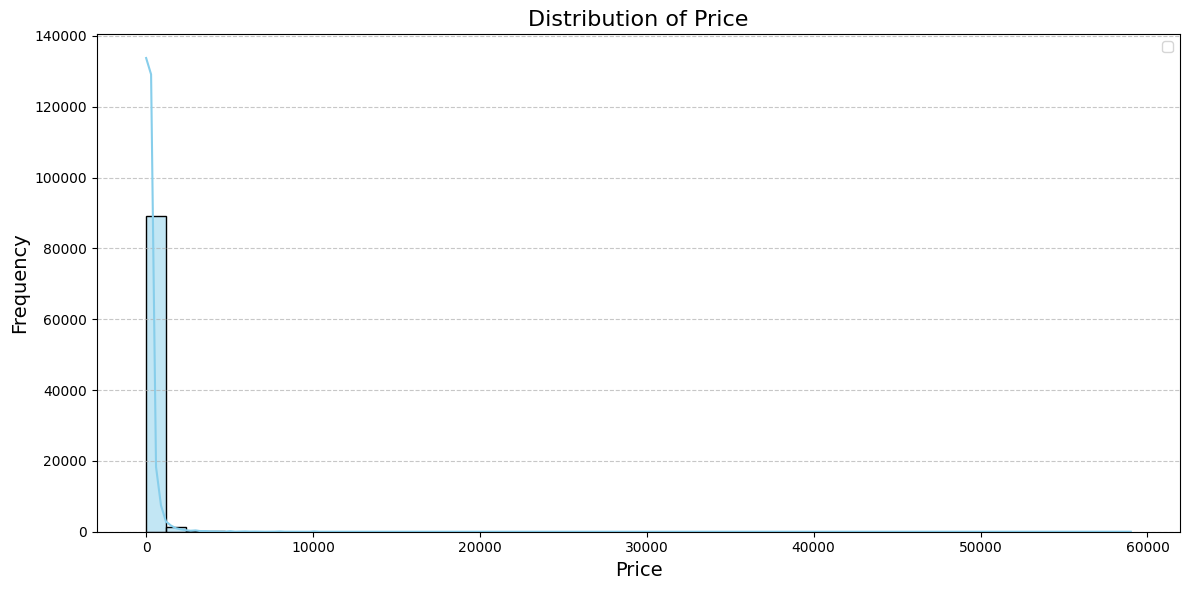

In [78]:
## Price Distribution

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(west_df['price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

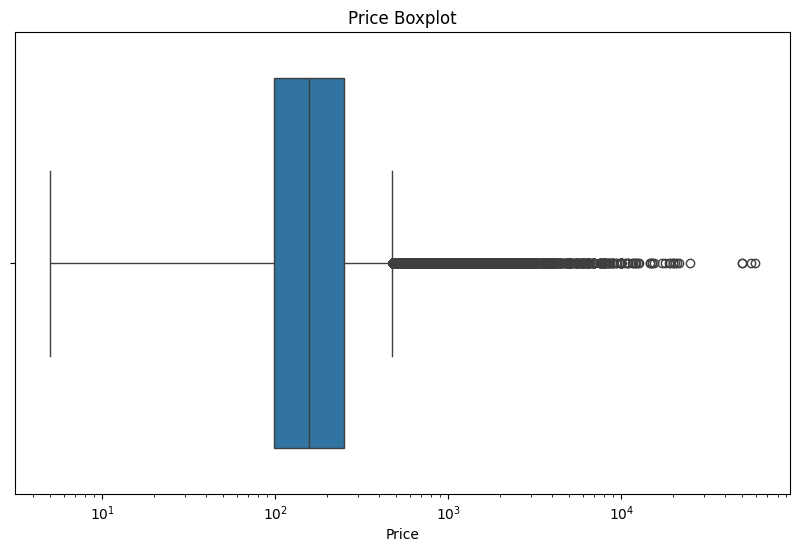

In [79]:
## Log transformed Price distribution

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=west_df['price'])
plt.xscale('log')
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()

## Price is highly right skewed

In [80]:
## Most preferable description words for Host to list their rentals

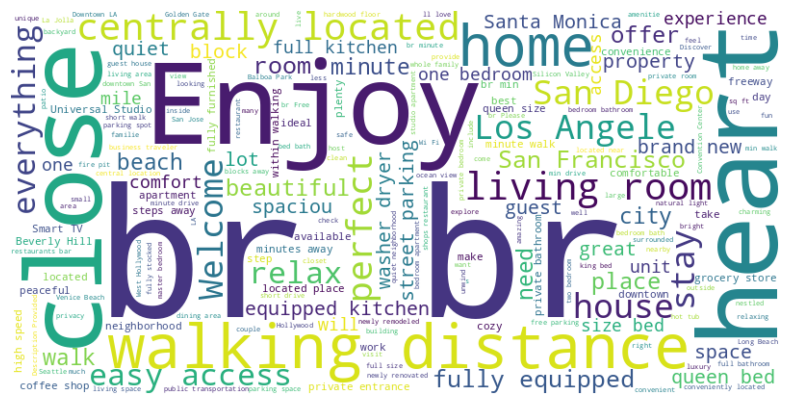

In [81]:
# Combine all descriptions into one large string, removing null values
text = " ".join(description for description in west_df['description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
west_df.columns

Index(['listing_url_present', 'name', 'description', 'picture_url_present',
       'host_url_present', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url_present', 'host_picture_url_present',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',

In [85]:
west_df[['State','City','description']]

,State,City,description
0,California,San Francisco,"This special place is close to everything, mak..."
1,California,San Francisco,Enjoy a stylish and zen experience at this mod...
2,California,San Francisco,Spacious 1-bed 1-bath condo in downtown SF nea...
3,California,San Francisco,Spacious private bedroom in a 1-bed 1-bath con...
4,California,San Francisco,1 bedroom condo in a new building located in t...
...,...,...,...
6437,Washington,King,"Discover this renovated vintage home, perfect ..."
6438,Washington,King,"Quite, safe, beautiful place"
6439,Washington,King,Relax at this peaceful place to stay. Centrall...
6440,Washington,King,-Close to the Link light-rail station which gi...


In [88]:
def generate_wordcloud_plotly(state, city):
    """
    Generates a word cloud for a given city and state using Plotly.

    Parameters:
        state (str): The state to filter the data.
        city (str): The city to filter the data.

    Returns:
        None: Displays an interactive word cloud using Plotly.

    Description:
        This function filters the `west_df` DataFrame to include only rows
        corresponding to the selected state and city. It then combines the
        descriptions from the filtered data and generates a word cloud
        visualization. The word cloud is displayed using Plotly's `Figure`.

    Example:
        generate_wordcloud_plotly("California", "Los Angeles")
    """
    # Filter the data for the selected state and city
    filtered_data = west_df[(west_df['State'] == state) & (west_df['City'] == city)]

    # Combine all descriptions for the selected state and city
    text = " ".join(description for description in filtered_data['description'].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Convert the word cloud to an image and display using Plotly
    fig = go.Figure(go.Image(z=wordcloud.to_array()))

    # Update layout for better visualization
    fig.update_layout(
        title=f"Word Cloud for {city}, {state}",
        xaxis_showgrid=False, yaxis_showgrid=False,
        xaxis_zeroline=False, yaxis_zeroline=False,
        xaxis_showticklabels=False, yaxis_showticklabels=False,
        height=500
    )

    # Show the figure
    fig.show()



In [89]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdown widgets for state and city
state_dropdown = widgets.Dropdown(
    options=west_df['State'].unique(),
    description='State:',
    style={'description_width': 'initial'}
)

city_dropdown = widgets.Dropdown(
    options=[],
    description='City:',
    style={'description_width': 'initial'}
)

# Update the city dropdown based on selected state
def update_cities(*args):
    selected_state = state_dropdown.value
    city_dropdown.options = west_df[west_df['State'] == selected_state]['City'].unique()

state_dropdown.observe(update_cities, names='value')

# Display the widgets
display(state_dropdown, city_dropdown)

# Button to trigger the function
generate_button = widgets.Button(description="Generate Word Cloud")

# Define button click action
def on_generate_click(b):
    state = state_dropdown.value
    city = city_dropdown.value
    if state and city:
        generate_wordcloud_plotly(state, city)

generate_button.on_click(on_generate_click)

display(generate_button)


Output hidden; open in https://colab.research.google.com to view.

In [83]:
# Save the merged dataframe to a CSV file on the local drive
#csv_file_path2 = 'D:/MSDA_SJSU/Data 230/Preprocessed Data/west_coast_rental_cleaned_df.csv'
#west_df.to_csv(csv_file_path2, index=False)

In [84]:
# Saving the file to local
file = west_df

# Specify the Google Drive path
save_path = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Preprocessed Data/Preprocessed_data_v0.1.csv'

# Save the dataframe to the specified path
file.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")

File saved to: /content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Preprocessed Data/Preprocessed_data_v0.1.csv
